<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/assignment/BIA_assignment_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> GRADED ASSIGNMENT</h1>

<div>
<td> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

Welcome to the Assignment! 

This notebooks contains two **independent** tasks. You will have to complete both tasks to receive a grade.
- The first task is about a Youtube video dataset.
- The second task is about a financial dataset on credit information of clients

In each part, we will provide you with a set of questions. You will have to answer these questions by writing code in the corresponding cells before ansering the quiz questions on Moodle.
Then, you will have to perform the following two steps:
- Answer the quiz questions on Moodle.
- Submit this notebook on Moodle

Make sure to follow all instructions carefully.

Good luck! 🍀

**Note**: Have your notebook with the answers ready for answering the quiz. 

**Questions**: You can post your questions in Moodle in the dedicated forum. No questions will be answered by email.

When creating a question, please make sure to provide a clear description of your problem and the code you have already tried.

Also in the object  of the message, use the following format: Part X - Question Y.Z where :
- X is the part number,
- Y is the question number
- Z is the sub-question number.

## PART I - DATA CLEANING AND EXPLORATION
First a few preliminary steps to set you up. You can execute the cells below to get you started.

In [52]:
# Import required packages
# You should not need additonal packages for this part but you can import any package you want

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Do not change the following line
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [53]:
# Load the data
df = pd.read_csv('https://storage.googleapis.com/bia-assignment/youtube.csv')

# Visualise first 3 rows
df.sort_values(by='upload_date', ascending=False).head(3)
a = df.sort_values(by='upload_date', ascending=False).head(3)
print(a, "\n\n\n",  df.columns)

                     channel upload_date  \
101598  Hong Giang DIY Slime  2019-10-03   
107247      Kabita's Kitchen  2019-10-03   
105473       Grandpa Kitchen  2019-10-03   

                                                    title tags  duration  \
101598  Mixing Random Things into Slime! Relaxing with...   []    730.00   
107247  डिजिटल समोसा | Noodles Samosa | Chinese Samosa...   []    628.00   
105473                                       Grandpa LIVE   []    180.00   

        view_count  average_rating  height   width    channel_cat  
101598    99632.00            4.24 1080.00 1920.00  Howto & Style  
107247    65919.00            4.86 1080.00 1920.00  Howto & Style  
105473   722915.00            4.96 1080.00 1920.00  Howto & Style   


 Index(['channel', 'upload_date', 'title', 'tags', 'duration', 'view_count',
       'average_rating', 'height', 'width', 'channel_cat'],
      dtype='object')


This Youtube dataset contains informations about multiple videos uploaded on youtube.
- **channel** : the channel id of that has uploaded the video
- **upload_date** : the date when the video has been uploaded on Youtube
- **title** : the title of the video
- **tags** : a list of tags that the author of the video has allocated to its video 
- **duration** : the duration of the video in seconds
- **view_count** : the number of views of a video
- **average_rating** : the average rating of the video when the metadata have been extracted
- **height, width** : the maxinal resolution of the video
- **channel_cat** : the category to which the channel belongs

### Question 1. How many observations (rows) and columns does the dataset contain?
Print the number of rows and colums of the dataset.

Print the number of null values in each column

In [54]:
# YOUR CODE HERE
nb_rows = df.shape[0]
nb_cols = df.shape[1]
print('Number of rows: ', nb_rows, sep='\t')
print('Number of columns: ', nb_cols, sep='\t')

Number of rows: 	139507
Number of columns: 	10


In [55]:
df.isnull().sum()

channel           0
upload_date       0
title             0
tags              0
duration          0
view_count        0
average_rating    0
height            0
width             0
channel_cat       0
dtype: int64

Now please check what are the data types of the different attributes (columns).

In [56]:
df.dtypes

channel            object
upload_date        object
title              object
tags               object
duration          float64
view_count        float64
average_rating    float64
height            float64
width             float64
channel_cat        object
dtype: object

Change the data type for the following columns: upload_date.
It should now be a date.

**Hint**: make sure that days, month, year are encoded correctly. For this you can check what the date looks like before and after the encoding. 

In [57]:
# YOUR CODE HERE
df['upload_date'] = pd.to_datetime(df['upload_date'])
df['upload_date'].head(1)

0   2013-03-04
Name: upload_date, dtype: datetime64[ns]

### Question 2. For which order period have these data samples been collected?

#### Question 2.1: What is the upload date of the oldest video ? and of the most recent video ?

In [58]:
# YOUR CODE HERE
min_date = df['upload_date'].min()
max_date = df['upload_date'].max()
print(f"The minimum upload date is {min_date}")
print(f"The maximum upload date is {max_date}")

The minimum upload date is 2005-12-28 00:00:00
The maximum upload date is 2019-10-03 00:00:00


#### Question 2.2: What is the view count of the oldest video? and of the newest video?

In [59]:
# YOUR CODE HERE
oldest_video_view = df.loc[df['upload_date'] == min_date]['view_count'].values[0] 
print(f"The oldest video has {oldest_video_view} views")

most_recent_video_view = df.loc[df['upload_date'] == max_date]['view_count'].values[-1] # As there's many videos at max_date date we take the last one of the index
print(f"The most recent video has {most_recent_video_view} views")

The oldest video has 517076.0 views
The most recent video has 169379.0 views


### Question 3. Categories analysis

#### Question 3.1: What are the average view count and total view count per category ("Gaming" and "Howto & Stlye") ?
**Hint**: Use the [`group_by()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function and refer to its documentation for examples on how to use it. The function `group_by()` is used to group the data by a certain column and is then followed by an aggregation function such as `sum()` or `mean()` which will be applied to the grouped data.
For example, to get the average income per country, you can use the following code:
```python
```python
df.groupby('country')['income'].mean()
```

Or if you want to get different statistics for different columns, you can use the following code:
```python
df.groupby('country').agg({'population': 'sum', 'income': ['mean', 'sdt']})
```
This will return a dataframe with the sum of the population and the mean and standard deviation of the average income per country.

In [60]:
# YOUR CODE HERE
# Filter the dataframe to include only the specified categories
filtered_df = df[df['channel_cat'].isin(['Gaming', 'Howto & Style'])]

# Calculate the average and total view count for each category
avg_count = filtered_df.groupby('channel_cat').agg({'view_count': ['mean', 'sum']})
print(avg_count)

              view_count                
                    mean             sum
channel_cat                             
Gaming        1632725.35 135986429274.00
Howto & Style 1538505.55  86493243255.00


#### Question 3.2: On one graph, plot monthly views for each channel category with a lineplot.
**Hint:** You may want to add new columns such as month and year and then do a groupy on these two columns by for the plot. Alternatively, another option is to use the [`resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function.

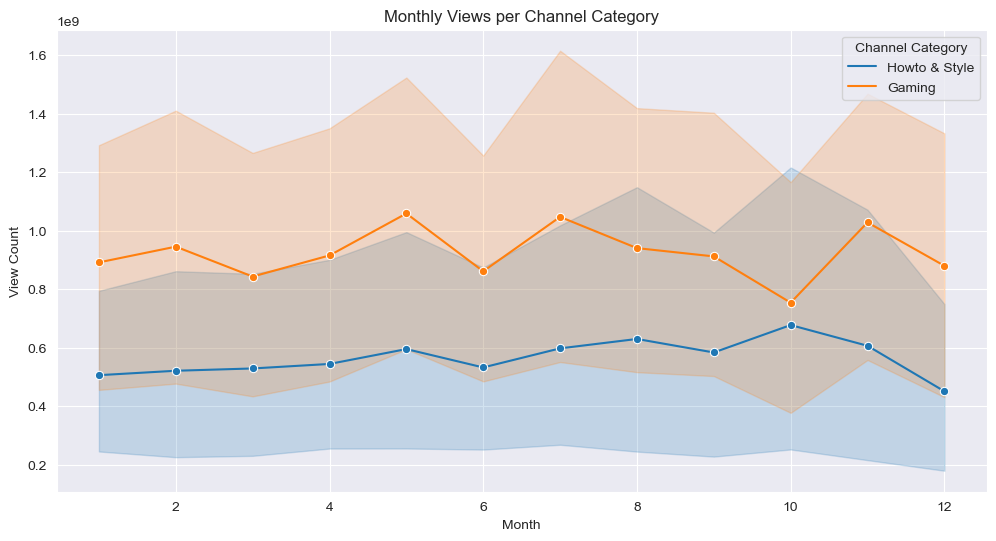

In [61]:
# Add columns for year and month
# YOUR CODE HERE
df['month'] = df['upload_date'].dt.month
df['year'] = df['upload_date'].dt.year

grouped_data = df.groupby(['year', 'month', 'channel_cat'])['view_count'].sum().reset_index()

# Create the lineplot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='month', y='view_count', hue='channel_cat', marker='o')
plt.title('Monthly Views per Channel Category')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.legend(title='Channel Category')
plt.show()

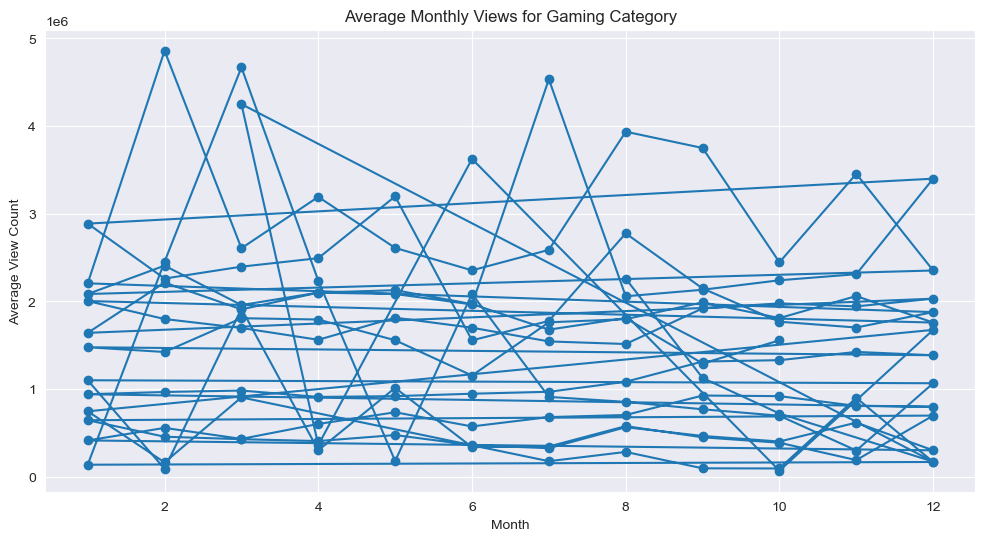

In [62]:
# Create a figure and plot the line chart of average views for the category Gaming
# Filter the data to only include the "Gaming" category
gaming_data = df[df['channel_cat'] == 'Gaming']

# Group the data by 'month' and 'year', and calculate the mean of views
grouped_gaming_data = gaming_data.groupby(['year', 'month'])['view_count'].mean().reset_index()

# Create the lineplot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(grouped_gaming_data['month'], grouped_gaming_data['view_count'], marker='o')
plt.title('Average Monthly Views for Gaming Category')
plt.xlabel('Month')
plt.ylabel('Average View Count')
plt.show()

#### Question 3.3: What is the correlation between the average monthly views of each channel category for the year 2012 ?
__Hint :__ You may want to filter data for the year 2012 first, then get monthly average views as a time series for both channels before computing the correlation.

In [63]:
# YOUR CODE HERE
data_2012 = df[df['year'] == 2012]

# Group the data by 'month', 'year', and 'channel_cat', and calculate the mean of views
grouped_data = data_2012.groupby(['year', 'month', 'channel_cat'])['view_count'].mean().reset_index()

# Pivot the grouped data to have channel categories as columns
pivot_data = grouped_data.pivot_table(values='view_count', index=['year', 'month'], columns='channel_cat')

# Calculate the correlation
correlation_matrix = pivot_data.corr()

# Print the correlation matrix
print(correlation_matrix)

channel_cat    Gaming  Howto & Style
channel_cat                         
Gaming           1.00           0.53
Howto & Style    0.53           1.00


In [64]:
# YOUR CODE HERE
# 1. Filter data for the year 2012
df_2012 = df[df['year'] == 2012]

# 2. Group by month and channel category, then calculate average views
monthly_avg_views = df_2012.groupby(['month', 'channel_cat'])['view_count'].mean().unstack()

# 3. Calculate the correlation
correlation = monthly_avg_views.corr()

print("Correlation between average monthly views of each channel category:\n", correlation)


Correlation between average monthly views of each channel category:
 channel_cat    Gaming  Howto & Style
channel_cat                         
Gaming           1.00           0.53
Howto & Style    0.53           1.00


### Question 4. Number of tags and the average rating of the videos

#### Question 4.1: Add a colum to the dataframe that contains the number of tags related to this video

In [65]:
# YOUR CODE HERE
df['number_of_tags'] = df['tags'].str.count(',') + 1 # x,x,x <- 2 commas + 1 = 3 letters

#### Question 4.2: Compute the correlation between the number of tags and the average rating of videos

In [66]:
# YOUR CODE HERE

#### Question 4.3: Compute the correlation between the length of the title and the average rating of videos

In [67]:
# YOUR CODE HERE
correlation = df['number_of_tags'].corr(df['average_rating'])
print("Correlation between the number of tags and the average rating of videos: ", correlation)

Correlation between the number of tags and the average rating of videos:  0.10213514045393356


### Question 5. Average duration of videos

#### Question 5.1: Compute the average duration of videos each year.

In [68]:
# Compute the average duration of videos each year.
average_duration_per_year = df.groupby('year')['duration'].mean()

print("Average duration of videos each year:\n", average_duration_per_year)

Average duration of videos each year:
 year
2005    230.00
2006     85.57
2007    230.24
2008    158.31
2009    265.65
2010    412.19
2011    484.65
2012    548.75
2013    676.89
2014    731.04
2015    817.75
2016    785.20
2017    896.68
2018   1191.10
2019   1239.98
Name: duration, dtype: float64


#### Question 5.2: Plot the average duration of video per year for both categories on the same plot.

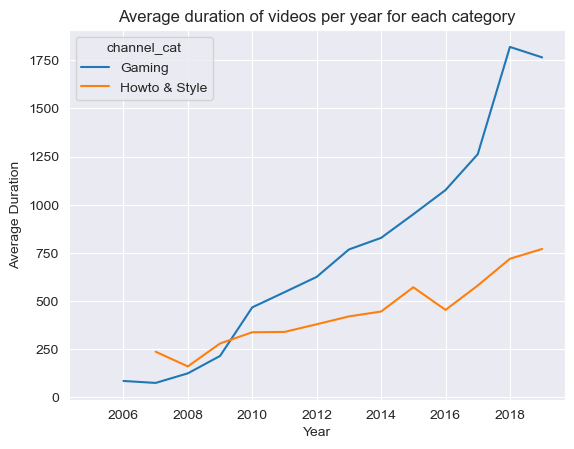

In [69]:
# YOUR CODE HERE
average_duration_per_year_category = df.groupby(['year', 'channel_cat'])['duration'].mean().unstack()

average_duration_per_year_category.plot(kind='line')
plt.title('Average duration of videos per year for each category')
plt.xlabel('Year')
plt.ylabel('Average Duration')
plt.show()

## PART II - CLASSIFICATION
For the second part, we will use a bank related dataset.   
The dataset contains information on a company's employees such as:

* customer ID
* customer age
* gender
* education level
* marital status
* income category
* credit limit
* ...


In [70]:
# All necessary imports
# You should not need additonal packages for this part but you can import any package you want

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

# Do not change the following line
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load the data

Load the dataset in a dataframe called `df` and visualise the first 5 rows.

In [71]:
# Load the data
df = pd.read_csv('https://storage.googleapis.com/bia-assignment/bank_data.csv')

df.sample(5)

,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CustomerID.1
13245,77892576,59,M,1,College,Single,$120K +,47,2,4,2,4789.01,357,4431.99,0.79,2496,41,0.64,0.06,77903730
15332,77906035,26,M,0,Graduate,Married,Less than $40K,36,5,2,4,9916.01,0,9916.01,0.80,3477,65,0.69,0.01,77905817
12049,77892055,47,M,3,Graduate,Unknown,$120K +,36,3,2,3,9396.99,795,8602.00,0.75,5265,98,0.58,0.09,77902534
1413,77909360,64,F,0,Graduate,Single,Unknown,56,3,2,4,4100.00,863,3236.98,1.00,3593,51,0.82,0.19,77891898
4015,77897723,52,M,4,High School,Married,$60K - $80K,44,6,3,4,4153.00,0,4152.99,0.44,1771,41,0.35,0.01,77894500


### Question 1: Data Exploration

#### Question 1.1 Create an historgam of the Education_Level column to get a sense of the data distribution for this column. What is the most common education level of the customers?

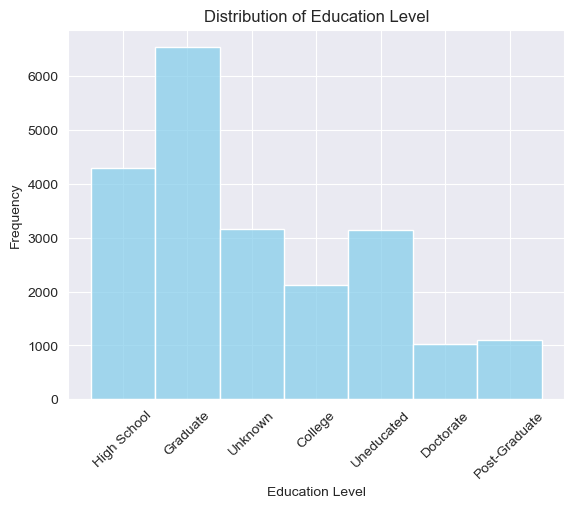

In [72]:
# YOUR CODE HERE
sns.histplot(data=df, x='Education_Level', color='skyblue')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=43.910929019)
plt.show()

#### Question 1.2 What is the age distribution of the people from the dataset ? Plot its distribution.
__Hint :__ Plot histogram from the _Customer_Age_ feature.

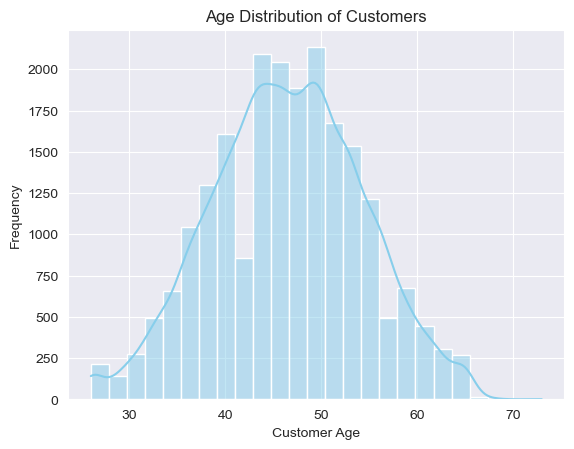

In [73]:
# YOUR CODE HERE
sns.histplot(data=df, x='Customer_Age', color='skyblue', bins=25, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

#### Question 1.3 Does the data distribution for the Customer_Age column look to follow a normal distribution? Compute the mean, standard deviation, skewness and kurtosis of the distribution.
__Hint :__ You may want to use the [`skew()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) function from the scipy library. For the kurtosis, you can use the [`kurtosis()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) function. <br>
If you want to test the normality of the distribution, you can use tjhe ktest function from the scipy library. For example, to test if the distribution of the Customer_Age column is normal, you can use the following code:
```python
from scipy.stats import kstest
kstest(df['column_tot_test'], 'norm')
```
Another alternative is to use jarque_bera test from the statsmodels library. You can refer to the documentation for more information on how to use it on the following link: https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html

The skewness and kurtosis of a normal distribution are respectively 0 and 3. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed. A negative skewness indicates that the tail on the left side of the distribution is longer or fatter. A positive skewness indicates that the tail on the right side is longer or fatter. The kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [74]:
from scipy.stats import skew, kurtosis
# YOUR CODE HERE
mean_age = df['Customer_Age'].mean()
std_age = df['Customer_Age'].std()
skewness_age = skew(df['Customer_Age'])
kurtosis_age = kurtosis(df['Customer_Age'])

print("Mean age: ", mean_age)
print("Standard deviation of age: ", std_age)
print("Skewness of age: ", skewness_age)
print("Kurtosis of age: ", kurtosis_age)

Mean age:  46.46480389403725
Standard deviation of age:  7.871644753905053
Skewness of age:  -0.05106729780832556
Kurtosis of age:  -0.29815371616534003


### Question 2. Convert categrocial columns to numerical
At this point, we will change some of the values in the dataset in order be able to work with these features. <br>
Indeed a clustering algorithm is based on distances between the data points. Therefore, we need to have numeric values instead of categorical variables.<br>

For this reason, we will perform the following mapping:
- We will map `Men` to 0 and `Female` to 1 of the column `Gender`
- We will also convert the `Income_Category` to a numeric value, where we will assume that the higher the income, the more likely the customer is to have a credit card. You should do the following mapping:

| Categorical Value (to be replaced)     | Numerical Value (new value to overwrite the categorical variable)     |
| -----------       | -----------   |
| 'Unknown'         |  -1           | 
| '$120K +'         |  120          | 
| '$80K - $120K'    |  80           | 
| '$60K - $80K'     | 60            |
| '$40K - $60K'     | 40            |
| 'Less than $40K'  | 0             | 

- We will also convert the `Education_Level` to a numeric value, where we will assume that the higher the education level, the more likely the customer is to have a credit card. Here again, you should respect the following convention:

| Categorical Value (to be replaced)     | Numerical Value (new value to overwrite the categorical variable)     |
| -----------       | -----------   |
| 'Unknown'         |  -1           | 
| 'Uneducated'      |   1           | 
| 'High School'     |  2            | 
| 'College'         | 3             |
| 'Graduate'        | 4             |
| 'Post-Graduate'   | 5             | 
| 'Doctorate'       | 6             | 

**Hint :** You may want to use the [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function applied to a column of a dataframe.

In [75]:
# Convert categorical variables to numerical variables

# Mapping for Gender column
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Mapping for Income_Category column
df['Income_Category'] = df['Income_Category'].map({
    'Unknown': -1,
    '$120K +': 120,
    '$80K - $120K': 80,
    '$60K - $80K': 60,
    '$40K - $60K': 40,
    'Less than $40K': 0
})

# Mapping for Education_Level column
df['Education_Level'] = df['Education_Level'].map({
    'Unknown': -1,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
})


In [76]:
# Here we drop all rows with missing values
df[['Customer_Age' , 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']].dropna(axis=0, how='any')
# We can see that there are no missing values in the columns we are interested in as the number of rows is the same as before

,Customer_Age,Gender,Income_Category,Education_Level,Credit_Limit
0,49,0,120,2,21143.99
1,42,1,0,4,1853.01
2,53,1,40,4,9815.01
3,63,1,0,2,2270.99
4,51,0,60,-1,4248.01
...,...,...,...,...,...
21361,56,1,0,4,3088.01
21362,50,0,120,4,20957.98
21363,46,0,40,1,9149.00
21364,53,0,120,-1,34516.02


In [77]:
# Keep only numerical columns of the dataframe
# These columns are the ones we are interested in as they can be used to cluster the customers

df_num = df.select_dtypes(include=np.number)
df_num.dropna()

,CustomerID,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CustomerID.1
0,77893100,49,0,2,2,120,42,3,2,4,21143.99,1190,19954.01,0.50,4895,66,0.78,0.06,77890485
1,77906340,42,1,4,4,0,34,3,2,3,1853.01,0,1852.99,0.85,4544,72,0.54,-0.00,77890486
2,77896672,53,1,5,4,40,41,2,1,3,9815.01,1699,8116.01,0.63,7962,89,0.57,0.18,77890487
3,77907011,63,1,0,2,0,53,5,3,2,2270.99,1278,992.99,0.37,1550,33,0.67,0.53,77890488
4,77899573,51,0,1,-1,60,22,2,3,3,4248.01,1177,3071.02,0.83,13958,116,0.78,0.29,77890489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,77904816,56,1,5,4,0,36,5,4,4,3088.01,2517,571.00,0.85,2292,54,0.87,0.82,77911846
21362,77893743,50,0,1,4,120,43,4,5,3,20957.98,0,20957.99,0.78,4425,78,0.69,0.01,77911847
21363,77896451,46,0,4,1,40,35,3,2,2,9149.00,1566,7582.99,0.97,1790,60,0.78,0.18,77911848
21364,77892298,53,0,4,-1,120,48,3,3,4,34516.02,278,34238.01,0.82,3029,49,0.41,0.01,77911849


### Question 3. Use the elbow method to find the optimal number of clusters for following feartures: _Customer_Age, Gender, Income_Category, Education_Level, Credit_Limit_
#### Question 3.1 : What is the inertia for 3 and 4 clusters ? (rounded to the nearest integer)
Refer to the lab 5 for any help about the methodology. <br>
__Hint:__ You should test between 2 to 10 clusters. Also, when you call the `KMeans` function, you should set the `random_state` paramter to 111 and the `n_init` to 50. This will ensure that the results are reproducible.

In [103]:
# from sklearn.preprocessing import StandardScaler

# YOU CODE HERE
# Elbow method to find the optimal number of clusters
X = df_num[['Customer_Age', 'Gender', 'Income_Category', 'Education_Level', 'Credit_Limit']].values

# # Scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

inertia = []
NB_ITER = 15
for n in range(1 , NB_ITER):
    algorithm = KMeans(n_clusters=n, random_state=111, n_init=50)
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
    if n == 3 or n == 4:
        print(f"Inertia for {n} clusters: {round(algorithm.inertia_)}")

Inertia for 3 clusters: 189440263472
Inertia for 4 clusters: 95572414216


### Question 4. Use the elbow method to find the optimal number of clusters for following features: _Income_Category, Education_Level, Months_on_book_
#### Question 4.1 : What is the optimal number of cluster for this sub dataset ?
Refer to the lab 5 for any help about the methodology. <br>
__Hint:__ You should test between 2 to 10 clusters. Also, when you call the `KMeans` function, you should set the `random_state` paramter to 111 and the `n_init` to 50. This will ensure that the results are reproducible.

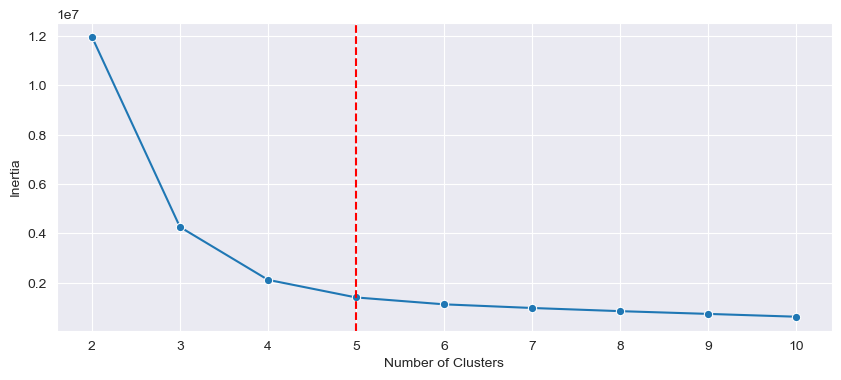

In [116]:
# YOU CODE HERE
# Define the features to use
features = df_num[['Income_Category', 'Education_Level', 'Months_on_book']]

# Define the range of possible number of clusters
NB_ITER2 = 11

# Perform KMeans for different number of clusters
inertia = []
for n_clusters in range(2, NB_ITER2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=111, n_init=50)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)




plt.figure(1 , figsize = (10, 4))
sns.lineplot(x = np.arange(2 , NB_ITER2), y = inertia, sort = False, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axvline(x=5, color='r', linestyle='--')
plt.show()


#### Question 4.2 : What is the cluster assignment (cluster ID - varying between 0 and the optimal number found previously) for a person with an income of 120K, a post-graduate degree and 36 months on book?

In [111]:
# YOUR CODE HERE

# Adjust the model with the optimal number of clusters
optimal_clusters = 5
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=111, n_init=50)
kmeans_optimal.fit(features)

# Define the new person
new_person = pd.DataFrame({
    'Income_Category': [120],  # mapped $120K + to 120
    'Education_Level': [5],    # mapped 'Post-Graduate' to 5
    'Months_on_book': [36]
})

# Predict the cluster for the new person
result = kmeans_optimal.predict(new_person)

print(f"Cluster assignment for the person described above: {result[0]}")


Cluster assignment for the person described above: 0


#### Question 4.3 : Get the cluster centroid for the person described above.
The get the centroid of a cluster, you can use the [`cluster_centers_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) attribute of the KMeans object.

In [113]:
# YOUR CODE HERE
# # Predict the cluster for the new person
result = kmeans_optimal.predict(new_person)

# Get the cluster centroid for the new person
centroid = kmeans_optimal.cluster_centers_[result[0]]

print(f"Cluster centroid for the person described above: {centroid}")

Cluster centroid for the person described above: [120.           2.33726481  36.85285032]
